<h1 align='center'; color ='blue'><b><font color='pickle'></p>Spam Detection Final Pipeline</b></h1>


In [3]:
#Load libraries
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import pandas as pd
from pathlib import Path
import zipfile
import tarfile
import numpy as np
import swifter
import re
import string
import random
from sklearn.base import BaseEstimator, TransformerMixin
from bs4 import BeautifulSoup
import spacy
import re
import os
from spacy.matcher import Matcher
from spacy.tokens import Token
from pathlib import Path
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from collections import defaultdict
from pathlib import Path
import joblib
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from pathlib import Path
import textwrap as tw
import matplotlib.pyplot as plt
#from scipy.sparse import hstack
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from  sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score, make_scorer
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


# <font color='pickle'> **Load the dataset  (1 Point)**

- For this project you will use spam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe. 

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
basepath = '/content/drive/MyDrive/NLP_Fall22/HW3/'
base_folder = Path(basepath)
data_folder = base_folder/'Data'
model_folder =  base_folder/'Models'

In [7]:
data = pd.read_csv(data_folder/'spam.csv',encoding='ISO-8859-1',usecols=['v1','v2'])
data.columns = ['label','message']

In [8]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [9]:
!python -m spacy download 'en_core_web_sm'

2022-09-23 01:56:18.808231: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 298 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
custom_functions = base_folder/'Scripts/custom_functions'
import sys
sys.path.append(str(custom_functions))
import custom_preprocessor as cp
from  featurizer import ManualFeatures
from  plot_learning_curve import plot_learning_curve

# <font color='pickle'> **Final Pipeline**</font>

With the understanding of Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* I am using the folllowing methods to create fearures which you can use in your model. 

    1. Sparse Embeddings (TF-IDF) 
    2. Feature Engineering (see examples below) 
    3. Sparse Embeddings (TF-IDF) + Feature Engineering 

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:** 

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/). 

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.). 

4. Think carefully about the pre-processing you will do.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn: 

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





# **Required Submissions:**
1.  Submit two colab/jupyter notebooks
- (analysis with smaller subset and all three pipelines)
- (analysis with bigger subset and only final pipeline)
2. Pdf version of the notebooks (HWs will not be graded if pdf version is not provided.
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw2, FirstName_file2_h2**

### **EDA**

In [ ]:
# Train and test split of dataset
len(data)

5572

In [75]:
# Capturing 10% of the dataset

spam_dataset = data.sample(frac=0.4, replace=True, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(spam_dataset['message'],spam_dataset['label'], test_size= 0.3, stratify=spam_dataset['label'])

In [76]:
spam_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 5157 to 1339
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    2229 non-null   object
 1   message  2229 non-null   object
dtypes: object(2)
memory usage: 52.2+ KB


In [77]:
y_train.value_counts()

ham     1369
spam     191
Name: label, dtype: int64

In [78]:
y_test.value_counts()

ham     587
spam     82
Name: label, dtype: int64

In [79]:
print(f'X_train: {X_train.shape} y_train: {y_train.shape}')
print(f'X_test: {X_test.shape} y_test: {y_test.shape}')

X_train: (1560,) y_train: (1560,)
X_test: (669,) y_test: (669,)


### Data preprocessing

In [80]:
X_train_cleaned = cp.SpacyPreprocessor(model = 'en_core_web_sm', remove_stop=True,stemming=True, remove_hashtag_prefix=True ).transform(X_train.to_list())

In [81]:
X_train_cleaned

['tough',
 'guy close',
 'get job wipro:)you thing life 2 3 year',
 'send aunty number',
 's training manual tech process:)it password reset troubleshooting',
 'happen',
 'urgent mobile 077xxx won å£2,000 bonus caller prize 02/06/03 2nd attempt reach 09066362206 asap box97n7qp 150ppm',
 'baaaaabe misss youuuuu teach class 5',
 'go to finish bath good fine night',
 'ok prob',
 'great comedy cant stop laugh da',
 'tell return order',
 'ready   lt;#&gt   inch pleasure',
 'eat jap oso aft ur lect wat ìï get lect 12 rite',
 'splashmobile choose 1000 gr8 tone wk subscrition service weekly tone cost 300p u credit kick enjoy',
 'come room point iron plan weekend',
 'sir send email log usc payment portal send message explain thing home great weekend',
 'alright sure let know leave',
 'house maid murderer coz man murder   lt;#&gt th january public holiday closed include post office understand',
 'message responce happend',
 'not sense free need know',
 'hi di yijue meet 7 pm esaplanade tonight',

In [82]:
# save  this to a file
X_train_cleaned_sparse_embed = data_folder/'Cleaned_data/x_train_cleaned_sparse_embed.pkl'
joblib.dump(X_train_cleaned, X_train_cleaned_sparse_embed)

['/content/drive/MyDrive/NLP_Fall22/HW3/Data/Cleaned_data/x_train_cleaned_sparse_embed.pkl']

In [83]:
X_test_cleaned = cp.SpacyPreprocessor(model = 'en_core_web_sm', remove_stop=True,stemming=True, remove_hashtag_prefix=True ).transform(X_test.to_list())

# save  this to a file
X_test_cleaned_sparse_embed = data_folder / 'Cleaned_data/x_test_cleaned_sparse_embed.pkl'
joblib.dump(X_test_cleaned, X_test_cleaned_sparse_embed)

['/content/drive/MyDrive/NLP_Fall22/HW3/Data/Cleaned_data/x_test_cleaned_sparse_embed.pkl']

# **Pipeline 2: Data Preprocessing + Manual Features + ML Model pipeline**

### Generate Manual Features

In [84]:
featurizer =  ManualFeatures(spacy_model='en_core_web_sm')

In [85]:
type(X_train.values)

numpy.ndarray

In [86]:
X_train_features, feature_names  = featurizer.fit_transform(X_train.values)

In [87]:
feature_names

['count_words',
 'count_characters',
 'count_characters_no_space',
 'avg_word_length',
 'count_digits',
 'count_numbers',
 'noun_count',
 'aux_count',
 'verb_count',
 'adj_count',
 'ner']

### Create pipeline 2

In [88]:
classifier_1b = Pipeline([('classifier', LogisticRegression(max_iter = 10000)),
                        ])

### Parameter grid

In [89]:
# We have used default valus for all parameters except for lammetizer
# Ideally we can specify range of values for all parameters
# If the search space is very large then we should use RandomSerachCV

param_grid_classifier_1b = {'classifier__C': [0.01, 10, 1000,100000]}


### Apply gridsearch


In [99]:
# We will now use Gridserach to find fine tune hyperparameters using cross validation
# The advantage of using pipelines is that we can avoid data leakage
# Since we have balanced data set, we will use default scoring method of accuracy
# the typical value of cv used is 5. We are using 3, just for demonstration.
# We will now use Gridserach to find fine tune hyperparameters using cross validation
# The advantage of using pipelines is that we can avoid data leakage
# Since we have balanced data set, we will use default scoring method of accuracy
# the typical value of cv used is 5. We are using 3, just for demonstration.
from sklearn.metrics import f1_score, make_scorer
def f2_func(y_true, y_pred):
    f2_score = fbeta_score(y_true, y_pred, beta=0.5,pos_label='ham')
    return f2_score

def my_f2_scorer():
    return make_scorer(f2_func)

grid_classifier_1b = GridSearchCV(estimator=classifier_1b, param_grid=param_grid_classifier_1b, cv = 3,scoring=my_f2_scorer())

In [100]:
# Fit the model on training data
grid_classifier_1b.fit(X_train_features, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'classifier__C': [0.01, 10, 1000, 100000]},
             scoring=make_scorer(f2_func))

In [101]:
print("Best cross-validation score: {:.2f}".format(grid_classifier_1b.best_score_))
print("\nBest parameters: ", grid_classifier_1b.best_params_)
print("\nBest estimator: ", grid_classifier_1b.best_estimator_)

Best cross-validation score: 0.98

Best parameters:  {'classifier__C': 10}

Best estimator:  Pipeline(steps=[('classifier', LogisticRegression(C=10, max_iter=10000))])


### Save and Load mode;

In [102]:
file_model_features = model_folder / 'features_model.pkl'
joblib.dump(grid_classifier_1b.best_estimator_, file_model_features)

['/content/drive/MyDrive/NLP_Fall22/HW3/Models/features_model.pkl']

In [103]:
# load the saved model
grid_classifier_1b = joblib.load(file_model_features)

### Plot learning curve

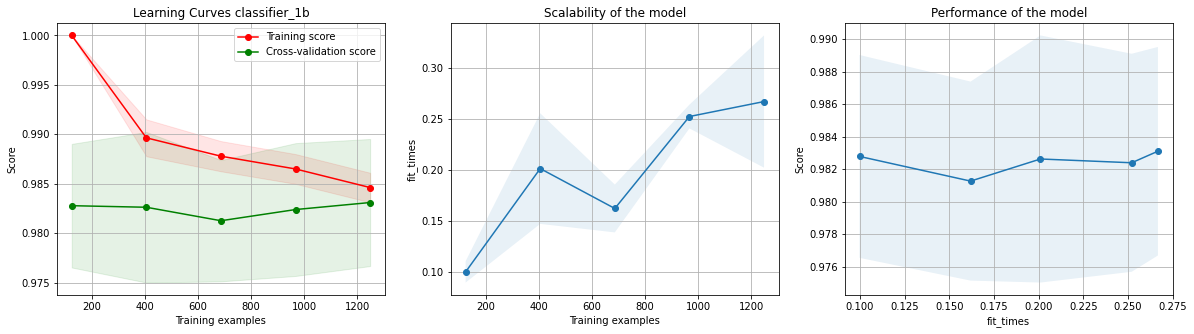

In [104]:
# plot learning curces
# This cell can take upto 30 minutes to run
plot_learning_curve(grid_classifier_1b, 'Learning Curves classifier_1b', X_train_features, y_train,scoring=my_f2_scorer())
plt.show()

In [105]:
# Accuracy on Train data set
grid_classifier_sparse_embed = grid_classifier_1b.score(X_train_features, y_train)
print(f'Accuracy on train set  is {grid_classifier_sparse_embed}')

Accuracy on train set  is 0.9794871794871794


### Evaluate model on test datset

In [106]:
# Final Pipeline
def final_pipeline(text):
  test_features, feature_names = featurizer.fit_transform(X_test.values)
  predictions = grid_classifier_1b.predict(test_features)
  return predictions
# predicted values for Test data set
y_test_pred = final_pipeline(X_test)

### Classification report for test dataset

In [107]:
print('\nTest set classification report:\n\n',classification_report(y_test, y_test_pred ))


Test set classification report:

               precision    recall  f1-score   support

         ham       0.98      0.99      0.98       587
        spam       0.93      0.83      0.88        82

    accuracy                           0.97       669
   macro avg       0.95      0.91      0.93       669
weighted avg       0.97      0.97      0.97       669



### In this case with larger dataset, the model's performance is not as good as it was for the smaller dataset. The reason being the hyperparameter tuning was done based on the smaller dataset. If the parameters are modified to fit this data better, the model would give better performance. 